In [1]:
#1: 

In [1]:
import pandas as pd
from matplotlib import pyplot as plt

In [2]:
df_train = pd.read_csv('./dataset/train.csv')
df_test = pd.read_csv('./dataset/test.csv')

df_country = pd.read_csv('./dataset/country.csv')
df_city = pd.read_csv('./dataset/worldcities.csv')

In [3]:
df_train.head()

,hotel_name,hotel_location,review_id,review_date,review_text,review_language,review_rating
0,Cobblestone Inn Suites-eads,Eads US,3mcTZLLqVE5ztNyE,28-11-2015,This is a new hotel. Great staff. Loved intera...,en,8.0
1,DoubleTree by Hilton London Islington,London 9LA United Kingdom,7HCg4Hk7ZbpQY60X,29-12-2015,Lovely attentive and welcoming staff Clean an...,en,10.0
2,citizenM Tower of London,London United Kingdom,yABlhfdJX4UlnNqA,08-09-2016,Cozy space to chill \n Not much variety of fo...,en,7.1
3,The Savoy,London United Kingdom,hS252WXcgeRVdch6,15-10-2011,The hotel has certainly benefited from the inv...,en,10.0
4,Millennium Gloucester Hotel London,NaN,Fo44un6pn2M7XoVJ,23-10-2015,Excellent location for the Albert Hall and pl...,en,10.0


In [4]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 278435 entries, 0 to 278434
Data columns (total 7 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   hotel_name       278435 non-null  object 
 1   hotel_location   270093 non-null  object 
 2   review_id        278435 non-null  object 
 3   review_date      278277 non-null  object 
 4   review_text      278434 non-null  object 
 5   review_language  278384 non-null  object 
 6   review_rating    278435 non-null  float64
dtypes: float64(1), object(6)
memory usage: 14.9+ MB


In [5]:
df_train.describe()

,review_rating
count,278435.000000
mean,8.427491
std,1.666610
min,2.000000
25%,7.500000
50%,8.800000
75%,10.000000
max,10.000000


In [6]:
df_train.describe(include=['object'])

,hotel_name,hotel_location,review_id,review_date,review_text,review_language
count,278435,270093,278435,278277,278434,278384
unique,2434,733,278435,4339,271354,39
top,The Savoy,London United Kingdom,3mcTZLLqVE5ztNyE,02-08-2017,Location,en
freq,3007,76208,1,1317,522,270961


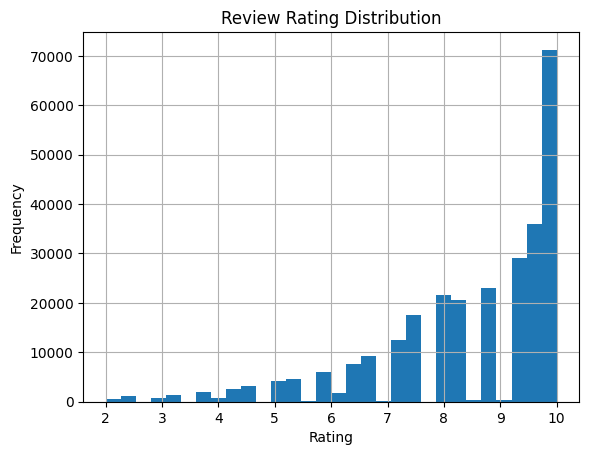

In [13]:
# Create histogram
plt.hist(df_train['review_rating'], bins=30)  # Adjust the number of bins as needed
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.title('Review Rating Distribution')
plt.grid(True)
plt.savefig('images/review_rating_distribution.png')
plt.show()


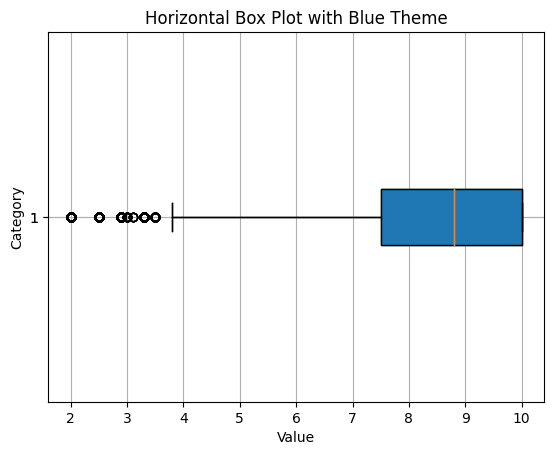

In [20]:
# Create box plot
# Set the color palette
box_colors = ['#1f77b4', '#aec7e8', '#c6dbef']  # Blue color palette

# Create horizontal box plot with customized aesthetics
plt.boxplot(df_train['review_rating'], vert=False, patch_artist=True)

# Customizing boxplot elements with blue colors
for box, color in zip(plt.boxplot(df_train['review_rating'], vert=False, patch_artist=True)['boxes'], box_colors):
    box.set(facecolor=color)  # Set box facecolor to the specified blue shades

plt.xlabel('Value')
plt.ylabel('Category')
plt.title('Horizontal Box Plot with Blue Theme')
plt.grid(True)
plt.savefig('images/review_rating_boxplot.png')
plt.show()

# Data Understanding

## review_language

### review_language unique category

In [8]:
df_train['review_language'].unique()

array(['en', 'da', 'es', 'it', 'fr', 'de', 'ca', 'pt', 'ro', 'af', 'tr',
       'hu', 'pl', 'ko', 'hr', 'nl', 'no', 'et', 'vi', 'cy', 'so', 'sl',
       'tl', 'sw', nan, 'id', 'sv', 'fi', 'ja', 'lv', 'cs', 'sk', 'sq',
       'fa', 'ru', 'ar', 'lt', 'zh-cn', 'he', 'th'], dtype=object)

Terlihat bahwa review yang terdapat dari dataset menggunakan berbagai bahasa yang berbeda. Karena berdasarkan describe, bahasa inggris merupakan bahasa yang paling banyak digunakan, yaitu oleh 270k+ review, ada dua opsi yang bisa digunakan, yaitu:
- Pake data b ing saja
- Translate bahasa lain ke bahasa inggris

## hotel_location

Diketahui bahwa hotel_location ditulis dengan format 'Kota Negara', maka dari itu, untuk saat ini, kita pisahkan terlebih dahulu kota dengan negara. Metode pemisahannya split sederhana dulu, kedepannya bisa diimprove karena bisa aja nama kota lebih dari satu kata.

In [9]:
df_city.head()

,city,city_ascii,lat,lng,country,iso2,iso3,admin_name,capital,population,id
0,Tokyo,Tokyo,35.6897,139.6922,Japan,JP,JPN,Tōkyō,primary,37732000.0,1392685764
1,Jakarta,Jakarta,-6.1750,106.8275,Indonesia,ID,IDN,Jakarta,primary,33756000.0,1360771077
2,Delhi,Delhi,28.6100,77.2300,India,IN,IND,Delhi,admin,32226000.0,1356872604
3,Guangzhou,Guangzhou,23.1300,113.2600,China,CN,CHN,Guangdong,admin,26940000.0,1156237133
4,Mumbai,Mumbai,19.0761,72.8775,India,IN,IND,Mahārāshtra,admin,24973000.0,1356226629


In [10]:
# Create a function to identify and split the country from location
def split_country(row):
    location = row['hotel_location']
    for country in df_country['value']:
        if country in location:
            return location.split(country)[0].strip(), country

    return location, None
    
# Fill NaN values in 'hotel_location' column with an empty string
df_train['hotel_location'].fillna('', inplace=True)

# Apply the function to split 'Location' into 'City' and 'Country' columns
df_train[['hotel_city', 'hotel_country']] = df_train.apply(split_country, axis=1, result_type='expand')

In [11]:
# Create a function to identify and split the city from recent city
def split_city(row):
    location = row['hotel_city']
    for city in df_city['city']:
        if city in location:
            return location.split(city)[0].strip(), city

    return location, None
    
# Fill NaN values in 'hotel_location' column with an empty string
df_train['hotel_city'].fillna('', inplace=True)

# Apply the function to split 'Location' into 'City' and 'Country' columns
df_train[['hotel_city', 'dump']] = df_train.apply(split_city, axis=1, result_type='expand')
df_train.drop('dump', axis = 1)

,hotel_name,hotel_location,review_id,review_date,review_text,review_language,review_rating,hotel_city,hotel_country
0,Cobblestone Inn Suites-eads,Eads US,3mcTZLLqVE5ztNyE,28-11-2015,This is a new hotel. Great staff. Loved intera...,en,8.0,Eads,US
1,DoubleTree by Hilton London Islington,London 9LA United Kingdom,7HCg4Hk7ZbpQY60X,29-12-2015,Lovely attentive and welcoming staff Clean an...,en,10.0,,United Kingdom
2,citizenM Tower of London,London United Kingdom,yABlhfdJX4UlnNqA,08-09-2016,Cozy space to chill \n Not much variety of fo...,en,7.1,,United Kingdom
3,The Savoy,London United Kingdom,hS252WXcgeRVdch6,15-10-2011,The hotel has certainly benefited from the inv...,en,10.0,,United Kingdom
4,Millennium Gloucester Hotel London,,Fo44un6pn2M7XoVJ,23-10-2015,Excellent location for the Albert Hall and pl...,en,10.0,,None
...,...,...,...,...,...,...,...,...,...
278430,Hilton London Euston,London United Kingdom,Oabt4y5utR4burvS,16-02-2016,The room we had on the ground floor was one o...,en,10.0,,United Kingdom
278431,Le Burgundy Paris,Paris France,t5xwremU01FrczxF,13-08-2015,Everyday there was a sweet sent to the room I...,en,7.9,,France
278432,Best Western Premier Kaiserhof Wien,Wieden Austria,jNFRId7DR7d8AGO1,25-10-2015,The staff are outstanding We arrived early in...,en,10.0,Wieden,Austria
278433,Novotel Paris Gare De Lyon,Paris France,vqcbMzXqiSuXRHMU,29-10-2015,Great staff\n Queue for breakfast,en,9.6,,France


In [12]:
df_train.hotel_city.value_counts()

                 259991
Marsh 9SJ          2382
Newham             1309
Devonshire         1125
Wieden             1062
                  ...  
Shandaken             1
Taos                  1
Saint Germain         1
Prosser               1
Cosby                 1
Name: hotel_city, Length: 177, dtype: int64

In [13]:
df_train.hotel_country.value_counts()

United Kingdom    140228
Spain              29929
France             25959
Austria            18853
Italy              18573
Netherlands        17258
US                  5037
Mexico               779
Switzerland          342
Panama               192
Nicaragua            186
India                  5
Chad                   2
Cuba                   1
Grenada                1
Name: hotel_country, dtype: int64

Berikut merupakan persebarannya, note: London tampaknya masih belum semua